In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
from datetime import datetime
from datetime import timedelta

In [2]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
    )

In [3]:
ads_data        = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-serebrjakov/shared/homeworks/python_ds_miniprojects/6/ads_data.csv')
ads_client_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-serebrjakov/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv')

In [4]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [5]:
events = ads_data.groupby(['ad_id', 'event'], as_index=False).agg({'ad_cost' : 'count'}, ascending = False) \
.pivot(index='ad_id', columns='event', values='ad_cost').fillna(0)

In [6]:
events.head()

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0


In [7]:
events.click.mean()

113.1378238341969

In [8]:
events.view.mean()

923.1316062176165

In [9]:
events['view_log'] = np.log(events.view)

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
ev_q = events.query('view_log > 0')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


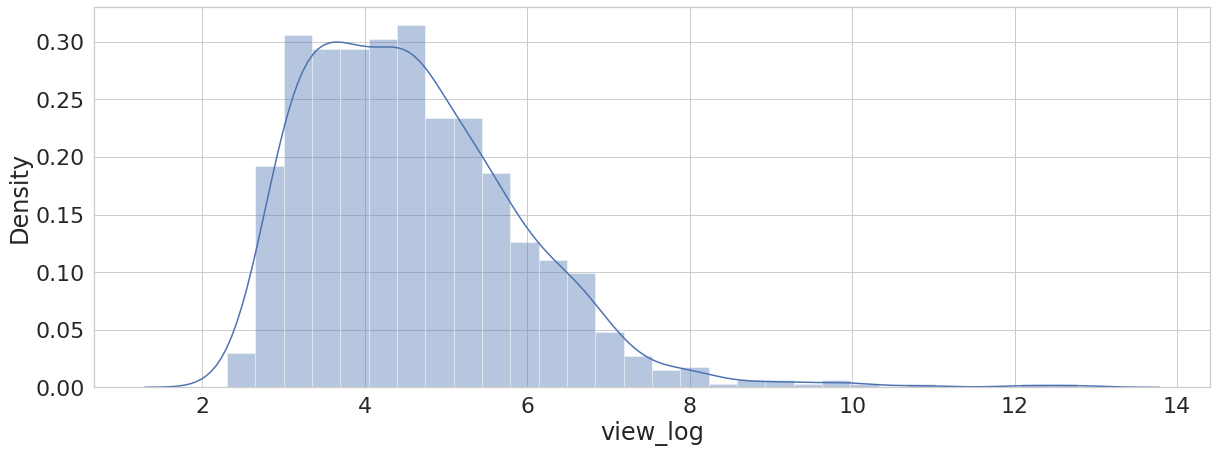

In [11]:
sns.distplot(ev_q.view_log)

In [12]:
view_rol = ads_data.query('event == "view"').groupby(['ad_id', 'date']).agg({'event' : 'count'}) \
.groupby('date').agg({'event' : 'mean'}).fillna(0).rolling(2).mean().round(0)

In [13]:
view_mean = ads_data.query('event == "view"').groupby(['ad_id', 'date']).agg({'event' : 'count'}) \
.groupby('date').agg({'event' : 'mean'}).fillna(0).round(0)

In [14]:
view_rol

,event
date,
2019-04-01,NaN
2019-04-02,146.0
2019-04-03,151.0
2019-04-04,420.0
2019-04-05,798.0
2019-04-06,598.0


In [15]:
view_mean

,event
date,
2019-04-01,154.0
2019-04-02,138.0
2019-04-03,164.0
2019-04-04,676.0
2019-04-05,919.0
2019-04-06,277.0


In [16]:
ads_client_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [17]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [18]:
ads_data_merge = ads_data.merge(ads_client_data, how='inner', on='client_union_id')

In [19]:
ads_data_merge['date_x'] = pd.to_datetime(ads_data_merge['date_x'])
ads_data_merge['create_date'] = pd.to_datetime(ads_data_merge['create_date'])

In [20]:
ads_data_merge['delta'] = ads_data_merge.date_x - ads_data_merge.create_date

In [21]:
ads_data_merge.groupby('client_union_id', as_index=False).agg({'delta' : 'min'}).delta.mean()

Timedelta('124 days 09:04:43.532219570')

In [38]:
ads_data_merge.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,delta
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days


In [39]:
delta_365 = pd.Timedelta(365, unit='day')

In [40]:
client_union = ads_data_merge.query('delta < @delta_365').groupby('client_union_id') \
    .agg({'campaign_union_id' : 'count'}).campaign_union_id.nunique()

In [41]:
client_union

376

In [52]:
delta = ads_data_merge.delta

In [65]:
client_union_1 = ads_data_merge.loc[delta < delta_365]

In [66]:
ads_data_merge.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,delta
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days


In [67]:
ads_data_merge.shape

(1000000, 15)

In [68]:
client_union_1.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,delta
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days


In [69]:
client_union_1.shape

(1000000, 15)

In [73]:
client_union = client_union_1.client_union_id.nunique()

In [74]:
client_all = ads_client_data.client_union_id.nunique()

In [75]:
conv = (client_union/client_all) * 100

In [76]:
round(conv, 2)

0.69